In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from SedCas_glacier_sed import SedCas
import inspect
# %matplotlib widget


In [2]:
# pip install --upgrade jupyterlab ipympl


In [3]:
# testing different sediment scenarious for sediment input for the system 


In [4]:
#load class
model = SedCas()

In [5]:
inspect.getmembers(model, predicate=inspect.ismethod)


[('__init__',
  <bound method SedCas.__init__ of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('load_climate',
  <bound method SedCas.load_climate of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('load_params',
  <bound method SedCas.load_params of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('plot_sedyield_monthly',
  <bound method SedCas.plot_sedyield_monthly of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('run_hydro',
  <bound method SedCas.run_hydro of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('run_sediment',
  <bound method SedCas.run_sediment of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('save_output',
  <bound method SedCas.save_output of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>),
 ('water_balance',
  <bound method SedCas.water_balance of <SedCas_glacier_sed.SedCas object at 0x7fe55933a5b0>>)]

In [6]:
# print parameters
model.load_params()
model.load_climate()


running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


saving output...


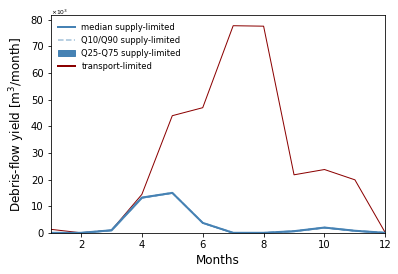

In [7]:
# model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()

In [8]:
hydro_out = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Hydro.out')
sed_out = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Sediment.out')



In [9]:
# hydro_out
sed_out.head()

,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl
0,1999-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# sed_out = sed_out.set_index('D')[200:20000]
sed_out['sc_diff'] = sed_out['sc'].diff()



sed_out2= sed_out[sed_out.Q100 > 0.2]

# filtered_df = df[df['X'] > 10]


In [11]:
sed_out

,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl,sc_diff
0,1999-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN
1,1999-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1999-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,1999-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1999-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158539,2017-10-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.507204,0.0,0.0,0.0,0.0
158540,2017-10-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.507204,0.0,0.0,0.0,0.0
158541,2017-10-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.507204,0.0,0.0,0.0,0.0
158542,2017-10-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.507204,0.0,0.0,0.0,0.0


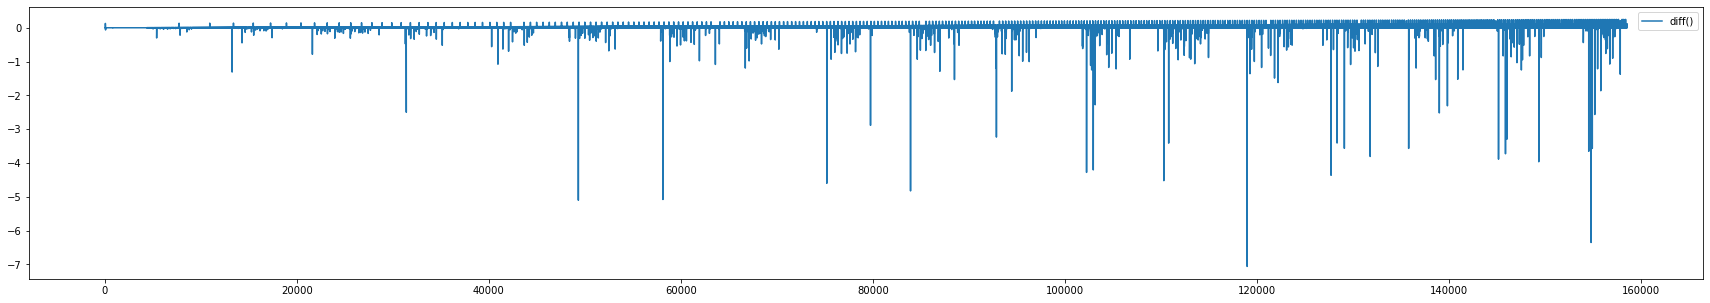

In [12]:

plt.figure(figsize = (30, 5))
# sed_out.sc.plot(color = 'cyan', label = 'channel sed storage')
# sed_out1.ls.plot(color = 'blue', label = 'ls')
sed_out.sc_diff.plot(label = 'diff()')
# sed_out2.sc_diff.plot(label = 'diff')


# plt.ylim(0, 0.1)
# sed_out1.Qdftl.plot(color = 'orange', label = 'Qdftl') # [mm/h]
# sed_out1.Q100.plot(label = 'Q100')
# plt.title('Sediment.out : large landslides')
plt.legend()

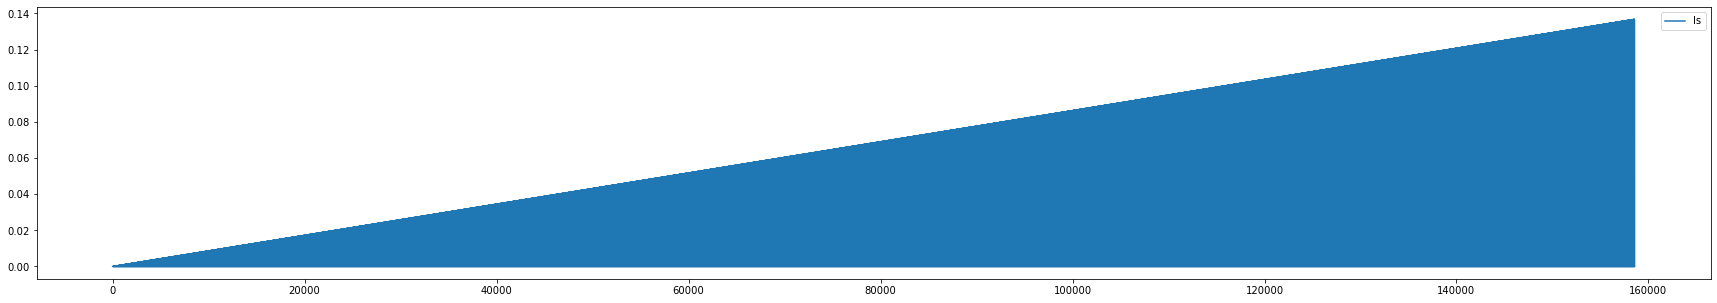

In [13]:

plt.figure(figsize = (30, 5))
# sed_out.sc.plot(color = 'cyan', label = 'channel sed storage')
sed_out.ls.plot(label = 'ls')

plt.legend()


In [14]:
sed_out['ls_diff'] = sed_out.ls.diff()


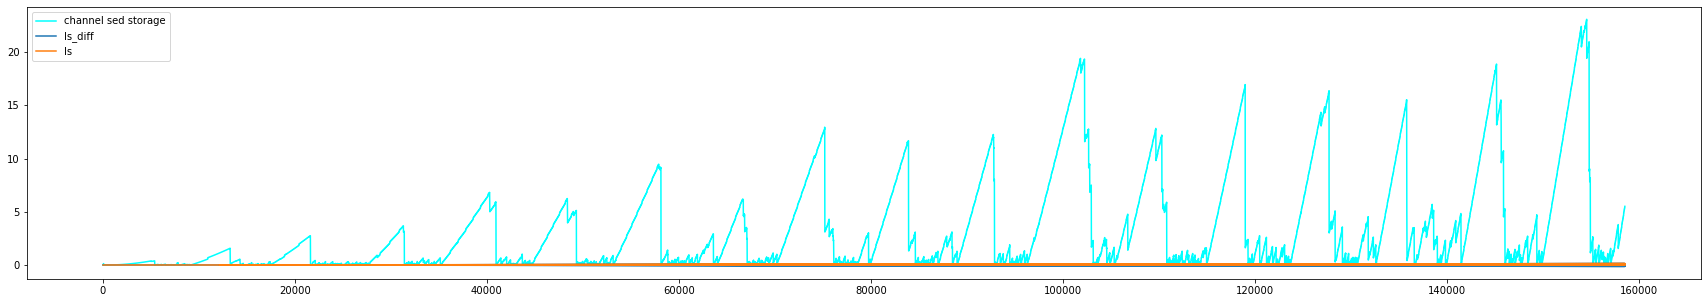

In [15]:

plt.figure(figsize = (30, 5))
sed_out.sc.plot(color = 'cyan', label = 'channel sed storage')
sed_out.ls_diff.plot(label = 'ls_diff')
sed_out.ls.plot(label = 'ls')#, alpha = 0.3)

plt.legend()


In [16]:
sed_out.ls_diff.mean()

0.0

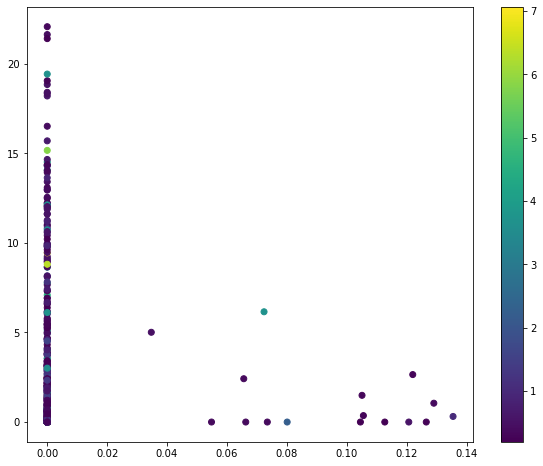

In [17]:
plt.figure(figsize = (10,8))

plt.scatter(y = sed_out2.sc, x = sed_out2.ls, c = sed_out2.Q100)

plt.colorbar()

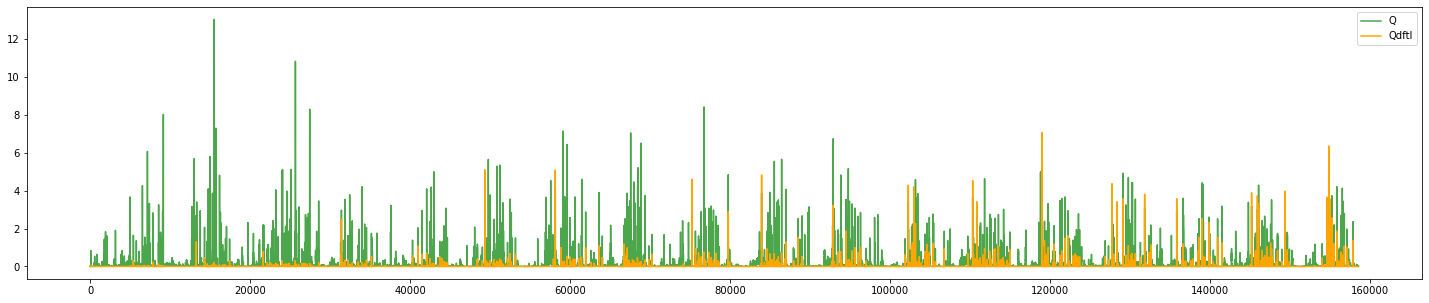

In [18]:

plt.figure(figsize = (25, 5))
# sed_out1.Qstl.plot(color = 'blue', label = 'Qdftl')
hydro_out.Q.plot(color = 'green', label = 'Q', alpha = 0.7)
sed_out.Q100.plot(color = 'orange', label = 'Qdftl')

plt.legend()

In [19]:
# plt.figure(figsize = (25, 5))
# sed_out1.Q100.plot()

In [20]:
hydro_out_new = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Hydro.out')
sed_out_new = pd.read_csv('/Users/varyabazilova/Desktop/paper2/sediment_scenarios/Sediment.out')

 

In [21]:

plt.figure(figsize = (30, 5))
sed_out1.sc.plot(color = 'cyan', label = 'channel sed storage')
sed_out_new.sc.plot(color = 'magenta', label = 'small ls zeros', alpha = 0.6)
# plt.ylim(0, 0.6)
# sed_out1.Qdftl.plot(color = 'orange', label = 'Qdftl') # [mm/h]
# sed_out1.Q100.plot(label = 'Q100')
plt.legend()

NameError: name 'sed_out1' is not defined

<Figure size 2160x360 with 0 Axes>